In [81]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
import matplotlib.pyplot as plt

(28, 28)


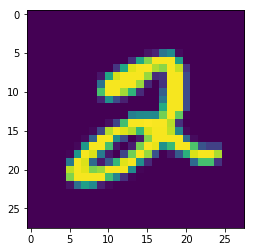

In [82]:
#splitting data into trainig and testing 
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

# just to plot an image 
import matplotlib.image as mpimg
print(xtrain[1].shape)
imgplot = plt.imshow(xtrain[5])
plt.show()

In [83]:


xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1]*xtrain.shape[2])
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1]*xtest.shape[2])


In [84]:
# data Normalisation
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [85]:
#  convert  to one hot encoding
print(ytrain[9])
print(ytest[9])
ytrain=np_utils.to_categorical(ytrain,10)
ytest=np_utils.to_categorical(ytest,10)
print(ytrain[9])
print(ytest[9])

4
9
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.initializers import RandomNormal


In [87]:
model = Sequential()
model.add(Dense(10,input_dim=784,activation='softmax')) # 10 is the output dimension(as we have 0 to 9 digits to classify)

In [88]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
history=model.fit(xtrain,ytrain,batch_size=256,epochs=15,validation_data=(xtest,ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 78us/sample - loss: 0.8692 - accuracy: 0.7882 - val_loss: 0.4734 - val_accuracy: 0.8833
Epoch 2/15
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4301 - accuracy: 0.8881 - val_loss: 0.3672 - val_accuracy: 0.9065
Epoch 3/15
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3624 - accuracy: 0.9026 - val_loss: 0.3289 - val_accuracy: 0.9112
Epoch 4/15
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3313 - accuracy: 0.9094 - val_loss: 0.3083 - val_accuracy: 0.9165
Epoch 5/15
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3130 - accuracy: 0.9140 - val_loss: 0.2955 - val_accuracy: 0.9178
Epoch 6/15
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3006 - accuracy: 0.9164 - val_loss: 0.2882 - val_accuracy: 0.9200
Epoch 7/15
60000/60000 [==============================] 

In [90]:
score=model.evaluate(xtest,ytest,verbose=1)
print(score[0])
print(score[1])

10000/10000 [==============================] - 0s 42us/sample - loss: 0.2649 - accuracy: 0.9269
0.2649122628092766
0.9269


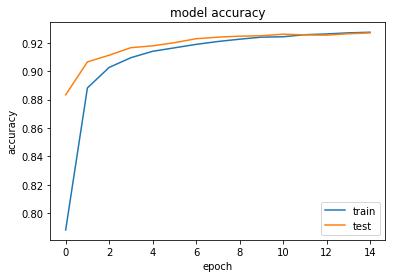

In [91]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

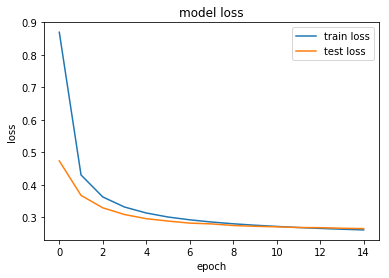

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')
plt.show()